In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
feature_names='sepal_length sepal_width'.split()
X = iris[feature_names]
y = iris['species'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
knn.score(X_test, y_test)

0.8

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[16,  0,  0],
       [ 0, 12,  5],
       [ 0,  4,  8]])

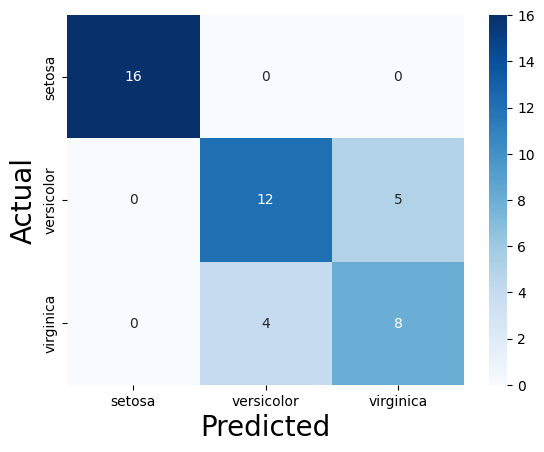

In [6]:
%matplotlib inline
f,ax = plt.subplots()
species_names = iris.species.unique()

sns.heatmap(cf_mat, cmap='Blues', annot=True, 
            xticklabels=species_names, yticklabels=species_names,
           );

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

## Precision
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠 / (𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠+𝐹𝑎𝑙𝑠𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠)
 
Q: What fraction of the positives predicted by our model were correct?

## Recall
𝑅𝑒𝑐𝑎𝑙𝑙=𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠/(𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠+𝐹𝑎𝑙𝑠𝑒 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠)
 
True Positives / All positives
True Positive Rate
Q: What fraction of all positives did our model get?


## F1 Score
𝐹1=2∗𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑟𝑒𝑐𝑎𝑙𝑙/(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑟𝑒𝑐𝑎𝑙𝑙)
 
Weighted harmonic mean of Precision and Recall
Best: 1, worst: 0

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
predictions = knn.predict(X_test)
cls_report_text = classification_report(y_test, predictions, target_names=species_names)

In [10]:
print(cls_report_text)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.75      0.71      0.73        17
   virginica       0.62      0.67      0.64        12

    accuracy                           0.80        45
   macro avg       0.79      0.79      0.79        45
weighted avg       0.80      0.80      0.80        45

